In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import getcwd
pd.set_option('display.max_rows', 10000)  # 显示的最大行数（避免只显示部分行数据）
pd.set_option('display.max_columns', 1000)  # 显示的最大列数（避免列显示不全）
pd.set_option("display.max_colwidth", 1000)  # 每一列最大的宽度（避免属性值或列名显示不全）
pd.set_option('display.width', 1000)

In [2]:
path = getcwd() + '/plot_file/ex1.txt'
data = np.loadtxt(path).astype(float)
data
#df = pd.read_csv(path,sep='\t',header=None,names=['population','profit']) # sep=设置分隔符,header=是否有头,names=设置姓名参数列表
df = pd.DataFrame({'population':np.squeeze(data[:,0:1]),'profit':np.squeeze(data[:,-1:])})
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 数据探测一下

In [3]:
df.population.describe() , df.profit.describe()#std是方法

(count    97.000000
 mean      8.159800
 std       3.869884
 min       5.026900
 25%       5.707700
 50%       6.589400
 75%       8.578100
 max      22.203000
 Name: population, dtype: float64,
 count    97.000000
 mean      5.839135
 std       5.510262
 min      -2.680700
 25%       1.986900
 50%       4.562300
 75%       7.046700
 max      24.147000
 Name: profit, dtype: float64)

In [4]:
x,y = data[:,0:1],data[:,-1:]
x,y

(array([[ 6.1101],
        [ 5.5277],
        [ 8.5186],
        [ 7.0032],
        [ 5.8598],
        [ 8.3829],
        [ 7.4764],
        [ 8.5781],
        [ 6.4862],
        [ 5.0546],
        [ 5.7107],
        [14.164 ],
        [ 5.734 ],
        [ 8.4084],
        [ 5.6407],
        [ 5.3794],
        [ 6.3654],
        [ 5.1301],
        [ 6.4296],
        [ 7.0708],
        [ 6.1891],
        [20.27  ],
        [ 5.4901],
        [ 6.3261],
        [ 5.5649],
        [18.945 ],
        [12.828 ],
        [10.957 ],
        [13.176 ],
        [22.203 ],
        [ 5.2524],
        [ 6.5894],
        [ 9.2482],
        [ 5.8918],
        [ 8.2111],
        [ 7.9334],
        [ 8.0959],
        [ 5.6063],
        [12.836 ],
        [ 6.3534],
        [ 5.4069],
        [ 6.8825],
        [11.708 ],
        [ 5.7737],
        [ 7.8247],
        [ 7.0931],
        [ 5.0702],
        [ 5.8014],
        [11.7   ],
        [ 5.5416],
        [ 7.5402],
        [ 5.3077],
        [ 7.

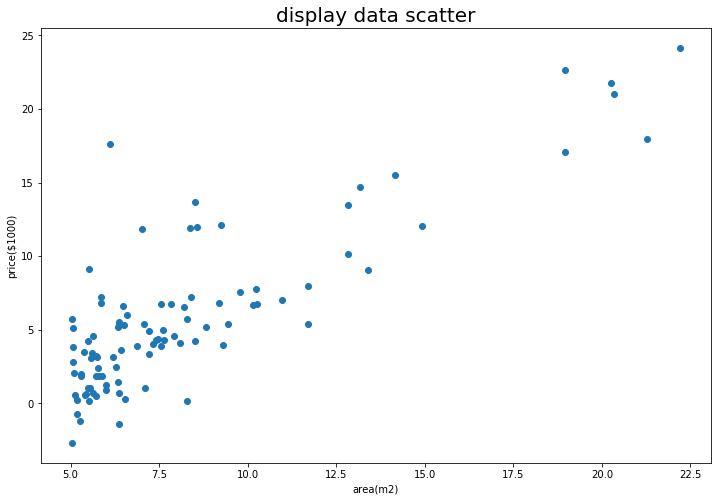

In [5]:
plt.figure(figsize=(12,8))
plt.title('display data scatter',fontsize=20) #图片标题
plt.scatter(x,y)
plt.xlabel('area(m2)') #x轴标签
plt.ylabel('price($1000)') #y轴标签
plt.show()
plt.close()



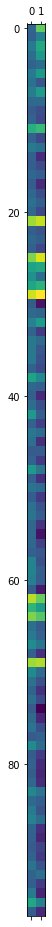

In [6]:
plt.matshow(df)

### 拓展数据维度
左右堆叠

a1 = np.array([1,2,3,4],dtype=np.complex128)  
print(a1)  
print("数据类型",type(a1))           #打印数组数据类型  
print("数组元素数据类型：",a1.dtype) #打印数组元素数据类型  
print("数组元素总数：",a1.size)      #打印数组尺寸，即数组元素总数  
print("数组形状：",a1.shape)         #打印数组形状  
print("数组的维度数目",a1.ndim)      #打印数组的维度数目  

In [7]:
srcx = data[:,0:1]
#创造一个全为1的数组
one_array = np.ones_like(srcx)
#左右堆叠数组
new_x = np.hstack((one_array,srcx))
theta = np.mat(np.array([0,0]))
'''矩阵乘法计算后-y'''
np.dot(new_x,theta.T)-y,new_x,theta.T

(matrix([[-17.592  ],
         [ -9.1302 ],
         [-13.662  ],
         [-11.854  ],
         [ -6.8233 ],
         [-11.886  ],
         [ -4.3483 ],
         [-12.     ],
         [ -6.5987 ],
         [ -3.8166 ],
         [ -3.2522 ],
         [-15.505  ],
         [ -3.1551 ],
         [ -7.2258 ],
         [ -0.71618],
         [ -3.5129 ],
         [ -5.3048 ],
         [ -0.56077],
         [ -3.6518 ],
         [ -5.3893 ],
         [ -3.1386 ],
         [-21.767  ],
         [ -4.263  ],
         [ -5.1875 ],
         [ -3.0825 ],
         [-22.638  ],
         [-13.501  ],
         [ -7.0467 ],
         [-14.692  ],
         [-24.147  ],
         [  1.22   ],
         [ -5.9966 ],
         [-12.134  ],
         [ -1.8495 ],
         [ -6.5426 ],
         [ -4.5623 ],
         [ -4.1164 ],
         [ -3.3928 ],
         [-10.117  ],
         [ -5.4974 ],
         [ -0.55657],
         [ -3.9115 ],
         [ -5.3854 ],
         [ -2.4406 ],
         [ -6.7318 ],
         [


(np.dot(new_x,theta.T)-y) 得到预测结果x与y的误差

以下定义**(损失函数）**：$$ [[{\theta_0},{\theta_1}]] $$

In [8]:
def theta():
    '''
    损失函数
    '''
    return np.mat(np.array([0,0])).T
theta()

matrix([[0],
        [0]])

以下定义**模型函数**：$$ h_\theta(x) = \theta_0 + \theta_1 x $$

In [9]:
def hypothesis(x):
    '''
    假设函数
    '''
    #创造一个全为1的数组
    #θ0+θ1x
    one_array = np.ones_like(x)
    #左右堆叠数组
    new_x = np.hstack((one_array,x))
    return new_x
srcx = data[:,0:1]
hypothesis(srcx)

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 


以下定义**cost function（代价函数）**：$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 $$

In [10]:
def computeCost(new_x=hypothesis(srcx),theta=theta(),y=y):
    '''损失函数'''
    #对每一个函数与y的误差做平方
    inner = np.power((np.dot(new_x,theta)-y),2 )
    return np.sum(inner)/(2*len(new_x))
computeCost()

32.072733877455676

以下定义**cost function **: $${J0} $$
**：$$ \frac{\alpha J}{{\alpha_0}{\theta_0}} = \frac{1}{N} \sum_{i=1} (X_{i1}{\theta_0}+X(i2){\theta_1}-Y_i)$$
$$ \frac{\alpha J}{{\alpha_0}{\theta_0}} = \frac{1}{N} \sum_{i=1} (X_{i1}{\theta_0}+X(i2){\theta_1}-Y_i)$$

In [11]:
X=hypothesis(srcx)
y=y
theta = theta()
alpha=0.01
iters=100
print(theta.T)

[[0 0]]


In [12]:
def gradienDescent(X,y,theta,alpha,iters): #alpha是学习率 iters是学习次数

    temp = np.mat(np.zeros(theta.shape)) #构建零值矩阵
    parameters = theta.shape[-1] #计算要求解的参数个数，并且降维为1
    cost= np.zeros(iters) #构建一个iters为0的数组,用来保存每一次迭代的损失函数参数
    
    for i in range(iters):
        error = (X * theta)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            term[0,j] = theta[0,j]-((alpha/len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost
    

gradienDescent(X,y,theta,alpha,iters)

ValueError: shapes (97,2) and (97,1) not aligned: 2 (dim 1) != 97 (dim 0)